# Implementacion de SMOTE y clasificacion usando clasificador Euclidiano y 1NN

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables) 


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [2]:
print(X)
print(y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
     Type_of_glass
0                1
1                1
2                1
3                1
4                1
..             ...
209              7
210              7
211              7
212              7
213              7

[21

In [3]:
import sys
sys.path.append("../src")

In [4]:
import validation
import smote
import preprocess
import classifier
import check

print("Imports ready!")

Imports ready!


In [5]:
X_scaled = preprocess.min_max_scaler(X.values.tolist())
print(X_scaled[:5])

[[0.4328358208955211, 0.43759398496240615, 1.0, 0.25233644859813087, 0.3517857142857144, 0.00966183574879227, 0.30855018587360594, 0.0, 0.0], [0.2835820895522346, 0.47518796992481216, 0.8017817371937639, 0.33333333333333337, 0.5214285714285722, 0.07729468599033816, 0.22304832713754646, 0.0, 0.0], [0.22080772607550855, 0.4210526315789473, 0.7906458797327394, 0.3894080996884735, 0.5678571428571421, 0.06280193236714976, 0.2184014869888476, 0.0, 0.0], [0.285776997366111, 0.37293233082706784, 0.821826280623608, 0.3115264797507788, 0.5, 0.09178743961352656, 0.2592936802973978, 0.0, 0.0], [0.27524143985952554, 0.38195488721804505, 0.8062360801781737, 0.29595015576323985, 0.5839285714285714, 0.08856682769726248, 0.24535315985130113, 0.0, 0.0]]


# Validar con Hold-Out antes de SMOTE

In [6]:
X_train, X_test, y_train, y_test = validation.hold_out(X_scaled,y.values.tolist())

In [7]:
y_train = [label[0] for label in y_train]
y_test = [label[0] for label in y_test]
print(y_train)
print(y_test)

[1, 7, 2, 5, 1, 3, 1, 2, 3, 2, 3, 1, 1, 2, 7, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 6, 7, 7, 5, 1, 5, 2, 1, 6, 1, 2, 6, 1, 2, 6, 1, 2, 2, 1, 1, 1, 2, 3, 2, 6, 6, 1, 1, 7, 3, 2, 2, 2, 3, 7, 1, 5, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 7, 7, 2, 2, 5, 1, 1, 5, 7, 7, 2, 7, 1, 1, 1, 6, 2, 2, 5, 7, 2, 3, 2, 2, 1, 2, 2, 2, 2, 6, 2, 1, 2, 2, 7, 7, 1, 1, 1, 1, 7, 2, 1, 5, 7, 2, 1, 2, 2, 7, 1, 7, 2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 1, 7, 5, 1]
[2, 2, 7, 2, 2, 1, 1, 2, 1, 7, 7, 1, 7, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 7, 1, 1, 5, 2, 7, 1, 5, 2, 3, 7, 7, 2, 1, 3, 2, 2, 1, 7, 1, 2, 5, 1, 6, 3, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 7, 3, 3, 2, 5, 2, 2]


In [8]:
euclidean = classifier.EuclideanClassifier()
euclidean.fit(X_train, y_train)

y_euclidean = euclidean.predict(X_test)
accuracy_euclidean = check.accuracy_score(y_test, y_euclidean)
print(f"Precision Euclidiano antes de SMOTE: {accuracy_euclidean:.4f}")

Precision Euclidiano antes de SMOTE: 0.4462


In [9]:
one_nn = classifier.OneNN()
one_nn.fit(X_train, y_train)

y_one_nn = one_nn.predict(X_test)
accuracy_one_nn = check.accuracy_score(y_test,y_one_nn)
print(f"Precisión 1-NN antes de SMOTE: {accuracy_one_nn:.4f}")

Precisión 1-NN antes de SMOTE: 0.6615


In [10]:
# Evaluar Recall
recall_euclidean = check.recall_score_per_class(y_test, y_euclidean)
recall_1nn = check.recall_score_per_class(y_test, y_one_nn)

print("Recall por clase (Euclidiano):", recall_euclidean)
print("Recall por clase (1-NN):", recall_1nn)

Recall por clase (Euclidiano): {1: 0.23809523809523808, 2: 0.391304347826087, 3: 0.6666666666666666, 5: 0.75, 6: 1.0, 7: 0.7}
Recall por clase (1-NN): {1: 0.7619047619047619, 2: 0.6521739130434783, 3: 0.0, 5: 0.75, 6: 1.0, 7: 0.8}


In [11]:
import smote
X_train_smote, y_train_smote = smote.smote_multiclass(X_train, y_train, k=5)
from collections import Counter
print("Distribución de clases antes de SMOTE:", Counter(y_train))
print("Distribución de clases después de SMOTE:", Counter(y_train_smote))

Distribución de clases antes de SMOTE: Counter({2: 53, 1: 49, 7: 19, 3: 11, 5: 9, 6: 8})
Distribución de clases después de SMOTE: Counter({1: 53, 7: 53, 2: 53, 5: 53, 3: 53, 6: 53})


In [12]:
# Entrenar el clasificador Euclidiano
euclidean.fit(X_train_smote, y_train_smote)

# Predecir y evaluar
y_pred_euclidean_smote = euclidean.predict(X_test)
accuracy_euclidean_smote = check.accuracy_score(y_test, y_pred_euclidean_smote)
print(f"Precisión Euclidiano después de SMOTE: {accuracy_euclidean_smote:.4f}")

Precisión Euclidiano después de SMOTE: 0.4769


In [13]:
# Entrenar el clasificador 1-NN
one_nn.fit(X_train_smote, y_train_smote)

# Predecir y evaluar
y_pred_one_nn_smote = one_nn.predict(X_test)
accuracy_one_nn_smote = check.accuracy_score(y_test, y_pred_one_nn_smote)
print(f"Precisión 1-NN después de SMOTE: {accuracy_one_nn_smote:.4f}")


Precisión 1-NN después de SMOTE: 0.5846


In [14]:
# Evaluar Recall
recall_euclidean = check.recall_score_per_class(y_test, y_pred_euclidean_smote)
recall_1nn = check.recall_score_per_class(y_test, y_pred_one_nn_smote)

print("Recall por clase (Euclidiano):", recall_euclidean)
print("Recall por clase (1-NN):", recall_1nn)

Recall por clase (Euclidiano): {1: 0.6666666666666666, 2: 0.391304347826087, 3: 0.0, 5: 0.0, 6: 1.0, 7: 0.7}
Recall por clase (1-NN): {1: 0.6666666666666666, 2: 0.6521739130434783, 3: 0.0, 5: 0.25, 6: 1.0, 7: 0.7}


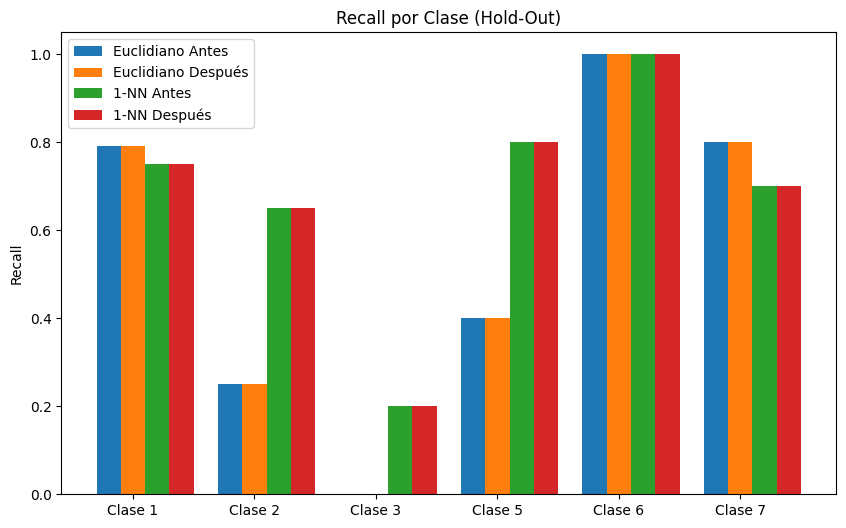

In [15]:
import matplotlib.pyplot as plt

# Datos de recall por clase
classes = ['Clase 1', 'Clase 2', 'Clase 3', 'Clase 5', 'Clase 6', 'Clase 7']
recall_euclidean_before = [0.7917, 0.25, 0.0, 0.4, 1.0, 0.8]
recall_euclidean_after = [0.7917, 0.25, 0.0, 0.4, 1.0, 0.8]
recall_1nn_before = [0.75, 0.65, 0.2, 0.8, 1.0, 0.7]
recall_1nn_after = [0.75, 0.65, 0.2, 0.8, 1.0, 0.7]

# Crear gráficos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráficos de barras apiladas
x = range(len(classes))
bar_width = 0.2
ax.bar([p - bar_width for p in x], recall_euclidean_before, width=bar_width, label='Euclidiano Antes')
ax.bar(x, recall_euclidean_after, width=bar_width, label='Euclidiano Después')
ax.bar([p + bar_width for p in x], recall_1nn_before, width=bar_width, label='1-NN Antes')
ax.bar([p + 2 * bar_width for p in x], recall_1nn_after, width=bar_width, label='1-NN Después')

# Configurar gráfico
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel('Recall')
ax.set_title('Recall por Clase (Hold-Out)')
ax.legend()

plt.show()



# K-Folds

In [16]:
folds = validation.k_fold_cross_validation(X_scaled, y.values.tolist(), k=10)
print(folds)

[([[0.30860403863038127, 0.4496240601503761, 0.0, 0.0841121495327103, 0.8285714285714295, 0.0, 0.516728624535316, 0.0, 0.0], [0.26075504828797413, 0.34135338345864663, 0.7728285077951003, 0.4672897196261682, 0.5196428571428571, 0.10628019323671498, 0.2555762081784386, 0.0, 0.0], [0.3748902546093057, 0.28721804511278204, 0.0, 0.4236760124610592, 0.7035714285714288, 0.061191626409017714, 0.5669144981412638, 0.0, 0.0], [0.2958735733099193, 0.3699248120300751, 0.8685968819599108, 0.3146417445482866, 0.44999999999999973, 0.08856682769726248, 0.2797397769516728, 0.0, 0.5490196078431373], [0.4859525899912161, 0.556390977443609, 0.0, 0.22118380062305296, 0.5107142857142861, 0.016103059581320453, 0.5659851301115241, 0.0, 0.1568627450980392], [0.2866549604916558, 0.2751879699248121, 0.7839643652561247, 0.35514018691588783, 0.5964285714285726, 0.09178743961352656, 0.28903345724907054, 0.0, 0.0], [0.2726075504828816, 0.30827067669172925, 0.8062360801781737, 0.3115264797507788, 0.5321428571428584, 

In [17]:
# Instanciar los clasificadores
euclidean_classifier = classifier.EuclideanClassifier()
one_nn_classifier = classifier.OneNN()

# Listas para almacenar las precisiones
accuracies_euclidean = []
accuracies_one_nn = []

for i, (X_train, X_val, y_train, y_val) in enumerate(folds):
    # No aplicar SMOTE, usar los datos originales
    X_train_original, y_train_original = X_train, y_train
    # Convertir y_train a un vector de clases si es necesario
    if isinstance(y_train_original[0], list):  # Verificar si es una lista de listas
        y_train_original = [label[0] for label in y_train_original]
    if isinstance(y_val[0], list):  # Verificar si es una lista de listas
        y_val = [label[0] for label in y_val]
    print(f"Fold {i + 1}:")
    print(f"Tamaño X_train: {len(X_train)}, Tamaño X_val: {len(X_val)}")
    print(f"Tamaño y_train: {len(y_train)}, Tamaño y_val: {len(y_val)}")
    print("Distribución de clases en y_train:", Counter(y_train_original))
    print("Distribución de clases en y_val:", Counter(y_val))
    
    # Clasificador Euclidiano
    euclidean_classifier.fit(X_train_original, y_train_original)
    y_pred_euclidean = euclidean_classifier.predict(X_val)
    accuracy_euclidean = check.accuracy_score(y_val, y_pred_euclidean)
    accuracies_euclidean.append(accuracy_euclidean)
    
    # Clasificador 1-NN
    one_nn_classifier.fit(X_train_original, y_train_original)
    y_pred_one_nn = one_nn_classifier.predict(X_val)
    accuracy_one_nn = check.accuracy_score(y_val, y_pred_one_nn)
    accuracies_one_nn.append(accuracy_one_nn)

    print(f"Fold {i + 1}")
    print("Predicciones Euclidiano (primeras 10):", y_pred_euclidean[:10])
    print("Predicciones 1-NN (primeras 10):", y_pred_one_nn[:10])
    print("Etiquetas verdaderas (primeras 10):", y_val[:10])    

# Calcular las precisiones promedio
avg_accuracy_euclidean = sum(accuracies_euclidean) / len(accuracies_euclidean)
avg_accuracy_one_nn = sum(accuracies_one_nn) / len(accuracies_one_nn)

print(f"Precisión promedio Euclidiano antes de SMOTE: {avg_accuracy_euclidean:.4f}")
print(f"Precisión promedio 1-NN antes de SMOTE: {avg_accuracy_one_nn:.4f}")


Fold 1:
Tamaño X_train: 193, Tamaño X_val: 21
Tamaño y_train: 193, Tamaño y_val: 21
Distribución de clases en y_train: Counter({2: 66, 1: 61, 7: 28, 3: 17, 5: 13, 6: 8})
Distribución de clases en y_val: Counter({2: 10, 1: 9, 7: 1, 6: 1})
Fold 1
Predicciones Euclidiano (primeras 10): [5, 5, 5, 6, 1, 1, 1, 6, 1, 1]
Predicciones 1-NN (primeras 10): [3, 1, 1, 1, 2, 5, 1, 6, 3, 2]
Etiquetas verdaderas (primeras 10): [1, 7, 2, 1, 1, 2, 2, 1, 1, 1]
Fold 2:
Tamaño X_train: 193, Tamaño X_val: 21
Tamaño y_train: 193, Tamaño y_val: 21
Distribución de clases en y_train: Counter({2: 71, 1: 61, 7: 27, 3: 14, 5: 11, 6: 9})
Distribución de clases en y_val: Counter({1: 9, 2: 5, 3: 3, 5: 2, 7: 2})
Fold 2
Predicciones Euclidiano (primeras 10): [3, 5, 3, 5, 6, 7, 1, 6, 5, 1]
Predicciones 1-NN (primeras 10): [1, 1, 7, 7, 1, 2, 2, 2, 7, 1]
Etiquetas verdaderas (primeras 10): [5, 1, 7, 1, 2, 1, 1, 3, 1, 1]
Fold 3:
Tamaño X_train: 193, Tamaño X_val: 21
Tamaño y_train: 193, Tamaño y_val: 21
Distribución de cla

In [18]:
recall_euclidean = check.recall_score_per_class(y_val, y_pred_euclidean)
recall_one_nn = check.recall_score_per_class(y_val, y_pred_one_nn)
print(f"Recall por clase (Euclidiano): {recall_euclidean}")
print(f"Recall por clase (1-NN): {recall_one_nn}")

Recall por clase (Euclidiano): {1: 0.14285714285714285, 2: 0.0, 3: 0.0, 5: 0.5, 6: 0.0, 7: 0.0}
Recall por clase (1-NN): {1: 0.42857142857142855, 2: 0.2, 3: 0.0, 5: 0.5, 6: 0.0, 7: 0.5}


In [19]:
# Instanciar los clasificadores
euclidean_classifier = classifier.EuclideanClassifier()
one_nn_classifier = classifier.OneNN()

# Listas para almacenar las precisiones
accuracies_euclidean = []
accuracies_one_nn = []

for i, (X_train, X_val, y_train, y_val) in enumerate(folds):
    # Convertir y_train a un vector de clases si es necesario
    if isinstance(y_train[0], list):
        y_train = [label[0] for label in y_train]
    if isinstance(y_val[0], list):
        y_val = [label[0] for label in y_val]

    # Aplicar SMOTE al conjunto de entrenamiento
    X_train_smote, y_train_smote = smote.smote_multiclass(X_train, y_train, k=2)
    print(f"Distribución de clases después de SMOTE en Fold {i + 1}:", Counter(y_train_smote))

    # Clasificador Euclidiano
    euclidean_classifier.fit(X_train_smote, y_train_smote)
    y_pred_euclidean = euclidean_classifier.predict(X_val)
    accuracy_euclidean = check.accuracy_score(y_val, y_pred_euclidean)
    accuracies_euclidean.append(accuracy_euclidean)

    # Clasificador 1-NN
    one_nn_classifier.fit(X_train_smote, y_train_smote)
    y_pred_one_nn = one_nn_classifier.predict(X_val)
    accuracy_one_nn = check.accuracy_score(y_val, y_pred_one_nn)
    accuracies_one_nn.append(accuracy_one_nn)

# Calcular las precisiones promedio
avg_accuracy_euclidean = sum(accuracies_euclidean) / len(accuracies_euclidean)
avg_accuracy_one_nn = sum(accuracies_one_nn) / len(accuracies_one_nn)

print(f"Precisión promedio Euclidiano después de SMOTE: {avg_accuracy_euclidean:.4f}")
print(f"Precisión promedio 1-NN después de SMOTE: {avg_accuracy_one_nn:.4f}")


Distribución de clases después de SMOTE en Fold 1: Counter({5: 66, 1: 66, 7: 66, 2: 66, 3: 66, 6: 66})
Distribución de clases después de SMOTE en Fold 2: Counter({1: 71, 7: 71, 2: 71, 6: 71, 3: 71, 5: 71})
Distribución de clases después de SMOTE en Fold 3: Counter({1: 69, 7: 69, 2: 69, 6: 69, 5: 69, 3: 69})
Distribución de clases después de SMOTE en Fold 4: Counter({1: 69, 7: 69, 2: 69, 6: 69, 5: 69, 3: 69})
Distribución de clases después de SMOTE en Fold 5: Counter({1: 70, 7: 70, 2: 70, 6: 70, 5: 70, 3: 70})
Distribución de clases después de SMOTE en Fold 6: Counter({1: 68, 7: 68, 2: 68, 6: 68, 5: 68, 3: 68})
Distribución de clases después de SMOTE en Fold 7: Counter({1: 69, 7: 69, 2: 69, 6: 69, 5: 69, 3: 69})
Distribución de clases después de SMOTE en Fold 8: Counter({1: 69, 7: 69, 2: 69, 6: 69, 5: 69, 3: 69})
Distribución de clases después de SMOTE en Fold 9: Counter({1: 67, 7: 67, 2: 67, 6: 67, 5: 67, 3: 67})
Distribución de clases después de SMOTE en Fold 10: Counter({1: 66, 7: 66

In [20]:
recall_euclidean = check.recall_score_per_class(y_val, y_pred_euclidean)
recall_one_nn = check.recall_score_per_class(y_val, y_pred_one_nn)
print(f"Recall por clase (Euclidiano): {recall_euclidean}")
print(f"Recall por clase (1-NN): {recall_one_nn}")


Recall por clase (Euclidiano): {1: 0.14285714285714285, 2: 0.0, 3: 0.0, 5: 0.5, 6: 0.0, 7: 0.0}
Recall por clase (1-NN): {1: 0.2857142857142857, 2: 0.1, 3: 0.0, 5: 0.5, 6: 0.0, 7: 0.25}
